In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

In [154]:
def calc_U(r, k):
    """
    r: 1d-vec containing positions (only x coordinate) of the particles
    """
    U = 0
    for i in range(1, len(r)):
        U += 0.5 * k * (r[i] - r[i-1])**2
    return U

def calc_force(r, k):
    fs = np.zeros(len(r))
    fs[0] = - k * (r[0]-r[1])
    fs[-1] = - k * (r[-1]-r[-2])
    for i in range(1, len(r) - 1):
        fs[i] = - k * (r[i]-r[i-1]) - k * (r[i]-r[i+1])
    return fs

def calc_force2(r, k, l=1):  # for harmonic bond, equilibrium at distance l
    fs = np.zeros(len(r))
    fs[0] = k * (abs(r[0]-r[1]) - l)
    fs[-1] = - k * (abs(r[-1]-r[-2]) - l)
    for i in range(1, len(r)-1):
        fs[i] = - k * (abs(r[i]-r[i-1]) - l) + k * (abs(r[i]-r[i+1]) - l)
    return fs

def integrate_vv(t0, tend, dt, r0, p0, forcefunc=calc_force):
    steps = int((tend - t0) / dt)
    t = np.arange(t0, tend, dt)
    r,p = np.zeros((steps, len(r0))), np.zeros((steps, len(r0)))
    r[0], p[0] = r0, p0
    for i in range(steps-1):
        p[i+1] = p[i] + 0.5 * dt * forcefunc(r[i], k)
        r[i+1] = r[i] + p[i+1] * dt / m
        p[i+1] = p[i+1] + 0.5 * dt * forcefunc(r[i+1], k)
    return r, p, t

In [155]:
# initial conditions for a)
l, m, k = 1, 1, 1
tau, eps = np.sqrt(m/k), k * l**2


def make_init(N, l=1):  # produced array with initial conditions
    r0 = l * np.arange(1, N+1)
    p0 = np.zeros(N)
    p0[0], p0[-1] = 0.5 * np.sqrt(m*eps), - 0.5 * np.sqrt(m*eps)
    return r0, p0

N = 11
r0, p0 = make_init(N)

# simulation details
t0 = 0
tend = 300

In [156]:
r, p, t = integrate_vv(t0, tend, 0.001, r0, p0, calc_force)

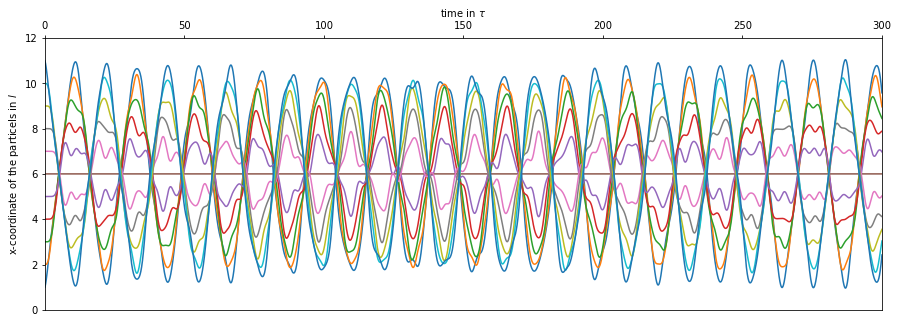

In [157]:
fig, ax = plt.subplots(figsize=(15,5))

for i in range(len(r0)):
    ax.plot(t, r[:,i])
    ax.set_xlim(t0, tend)
    ax.set_ylim(0, 12)
    ax.set_xlabel(r'time in $\tau$')
    ax.set_ylabel(r'x-coordinate of the particels in $l$')
ax.tick_params(top=True, bottom=False)
ax.tick_params(labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')

Why did I use velocity verlet 3 step? idk \
What do I observe?

### b)

In [158]:
def calc_T(p):
    return 1 / (3 * len(p)) * np.sum(p ** 2)

NN = np.array([2, 3, 11, 100])

ts = []
Ts = []
T = []

for N in NN:
    _, p, t = integrate_vv(t0, tend, 0.01, make_init(N)[0], make_init(N)[1], calc_force)
    for i in range(len(p)):
        T.append(calc_T(p[i]))
    ts.append(t)
    Ts.append(T)
    T, p, t = [], 0, 0

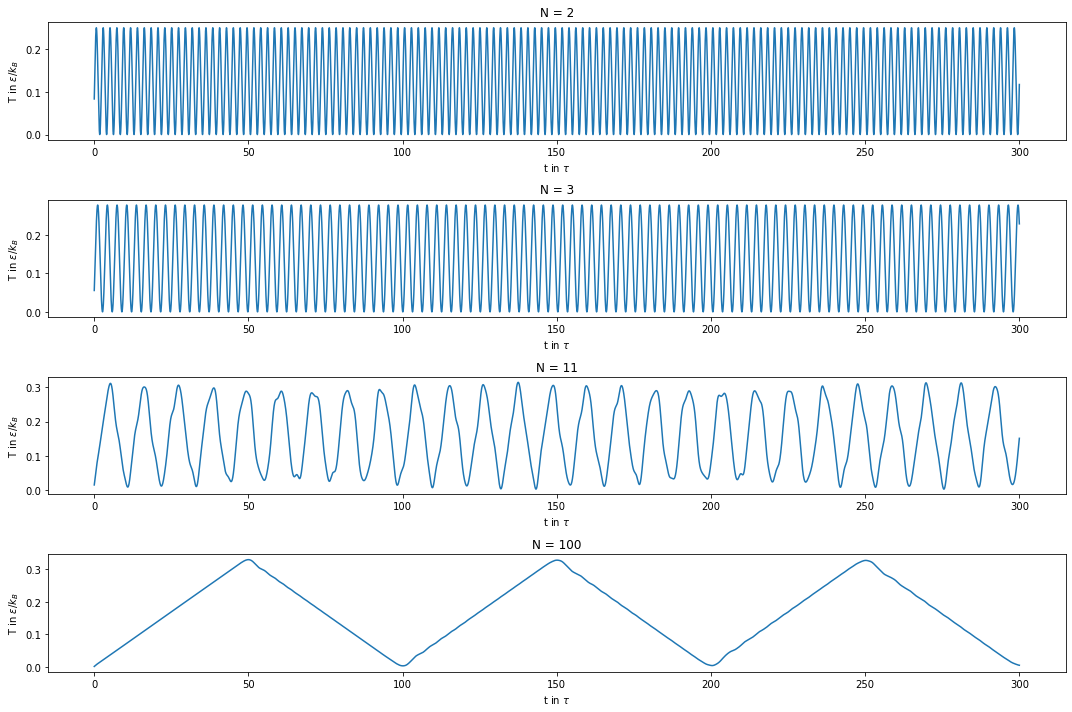

In [159]:
fig, ax = plt.subplots(4,1, figsize=(15,10))
for i in range(len(NN)):
    ax[i].plot(ts[i], Ts[i])
    ax[i].set_title(f'N = {NN[i]}')
    ax[i].set_xlabel(r't in $\tau$')
    ax[i].set_ylabel(r'T in $\epsilon / k_B$')
fig.tight_layout()

What do I excpect for the temperature? \
What do I observe?

### c)

In [160]:
NN = np.array([2, 3, 11, 100])

ts = []
Ds = []
Ds_avg = []

for N in NN:
    D, p, t, D_avg = [], 0, 0, 0
    r, p, t = integrate_vv(t0, tend, 0.01, make_init(N)[0], make_init(N)[1], calc_force)
    for i in range(len(p)):
        D.append(abs(r[i,0]-r[i,-1]))
    D_avg = np.average(D)
    ts.append(t)
    Ds.append(D)
    Ds_avg.append(D_avg)

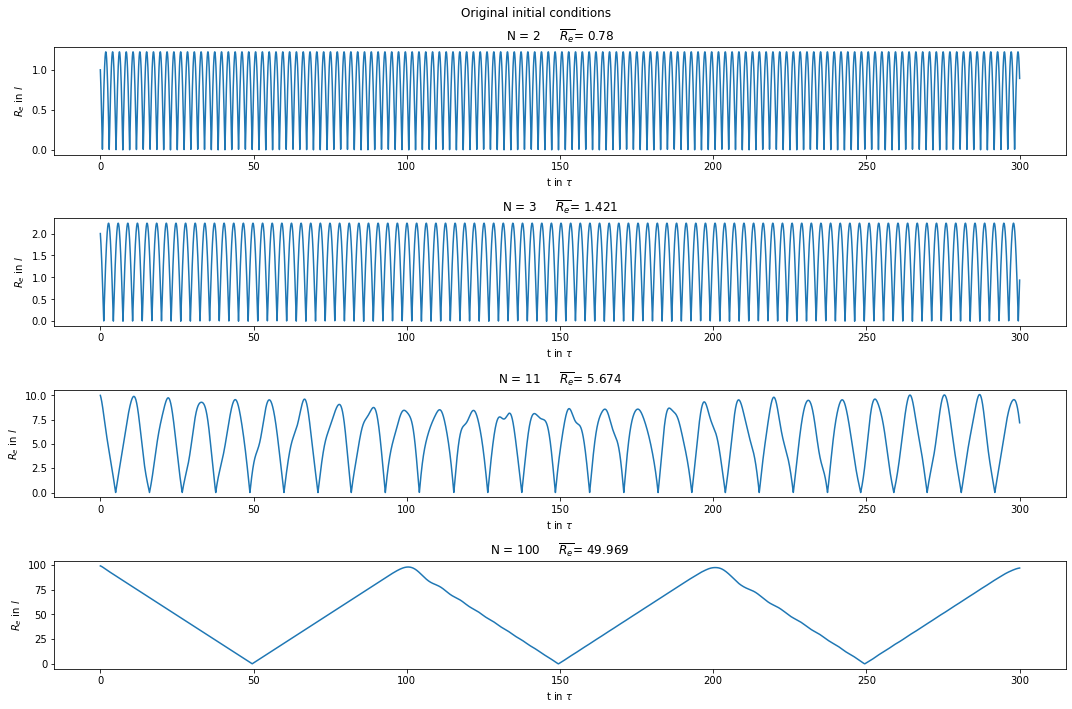

In [161]:
fig, ax = plt.subplots(4,1, figsize=(15,10))
for i in range(len(NN)):
    ax[i].plot(ts[i], Ds[i])
    ax[i].set_title(f'N = {NN[i]}     ' + r'$\overline{R_e}$' + f'= {round(Ds_avg[i], 3)}')
    ax[i].set_xlabel(r't in $\tau$')
    ax[i].set_ylabel(r'$R_e$ in $l$')
fig.suptitle('Original initial conditions')
fig.tight_layout()

In [162]:
def random_p(N, m=1, epsilon=1):
    p = np.random.normal(loc=0, scale=m*epsilon, size=N)
    return p

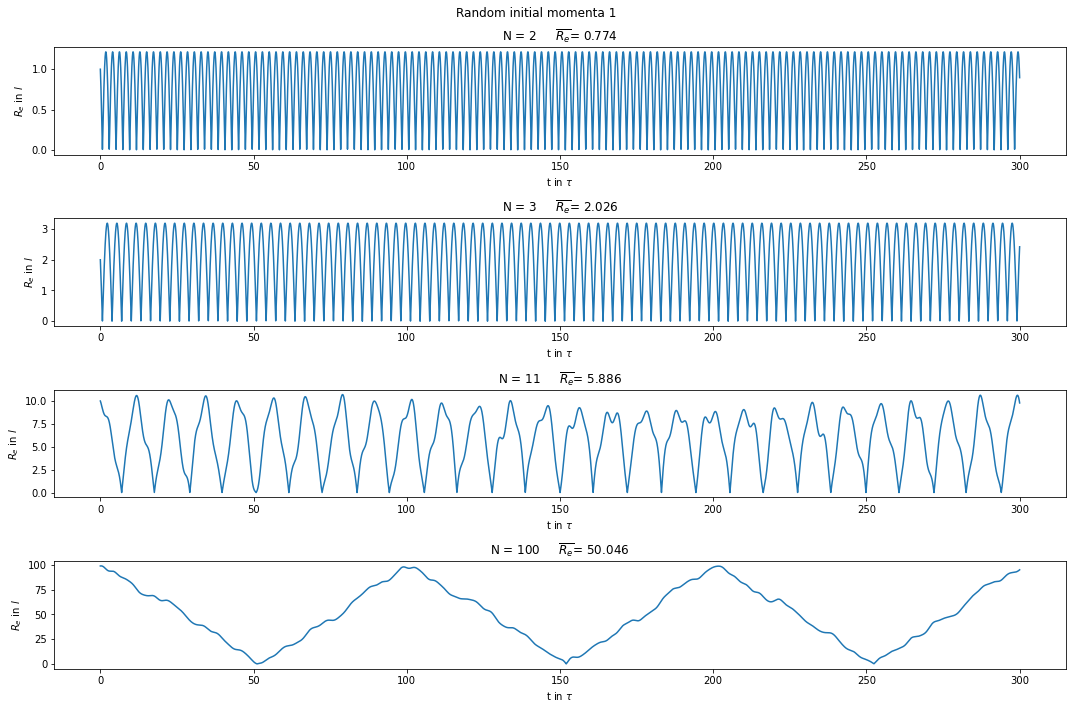

In [163]:
NN = np.array([2, 3, 11, 100])

ts = []
Ds = []
Ds_avg = []

for N in NN:
    D, p, t, D_avg = [], 0, 0, 0
    r, p, t = integrate_vv(t0, tend, 0.01, make_init(N)[0], np.random.normal(loc=0, scale=m*eps, size=N), calc_force)
    for i in range(len(p)):
        D.append(abs(r[i,0]-r[i,-1]))
    D_avg = np.average(D)
    ts.append(t)
    Ds.append(D)
    Ds_avg.append(D_avg)
fig, ax = plt.subplots(4,1, figsize=(15,10))
for i in range(len(NN)):
    ax[i].plot(ts[i], Ds[i])
    ax[i].set_title(f'N = {NN[i]}     ' + r'$\overline{R_e}$' + f'= {round(Ds_avg[i], 3)}')
    ax[i].set_xlabel(r't in $\tau$')
    ax[i].set_ylabel(r'$R_e$ in $l$')
fig.suptitle('Random initial momenta 1')
fig.tight_layout()

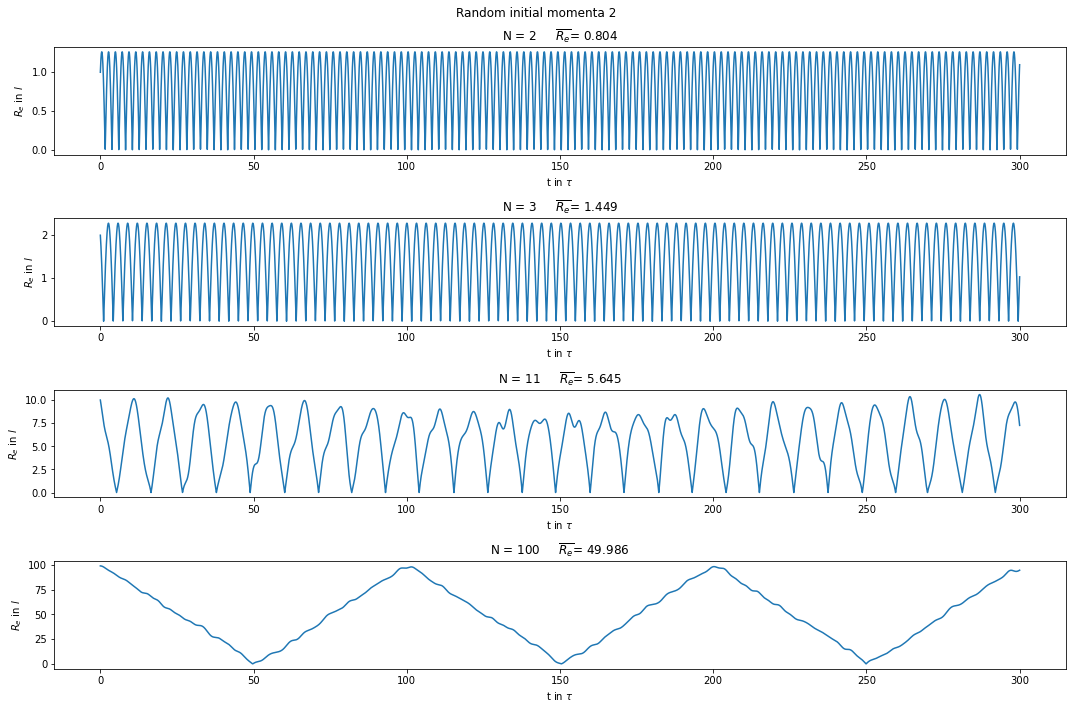

In [164]:
NN = np.array([2, 3, 11, 100])

ts = []
Ds = []
Ds_avg = []

for N in NN:
    D, p, t, D_avg = [], 0, 0, 0
    r, p, t = integrate_vv(t0, tend, 0.01, make_init(N)[0], np.random.normal(loc=0, scale=m*eps, size=N), calc_force)
    for i in range(len(p)):
        D.append(abs(r[i,0]-r[i,-1]))
    D_avg = np.average(D)
    ts.append(t)
    Ds.append(D)
    Ds_avg.append(D_avg)
fig, ax = plt.subplots(4,1, figsize=(15,10))
for i in range(len(NN)):
    ax[i].plot(ts[i], Ds[i])
    ax[i].set_title(f'N = {NN[i]}     ' + r'$\overline{R_e}$' + f'= {round(Ds_avg[i], 3)}')
    ax[i].set_xlabel(r't in $\tau$')
    ax[i].set_ylabel(r'$R_e$ in $l$')
fig.suptitle('Random initial momenta 2')
fig.tight_layout()

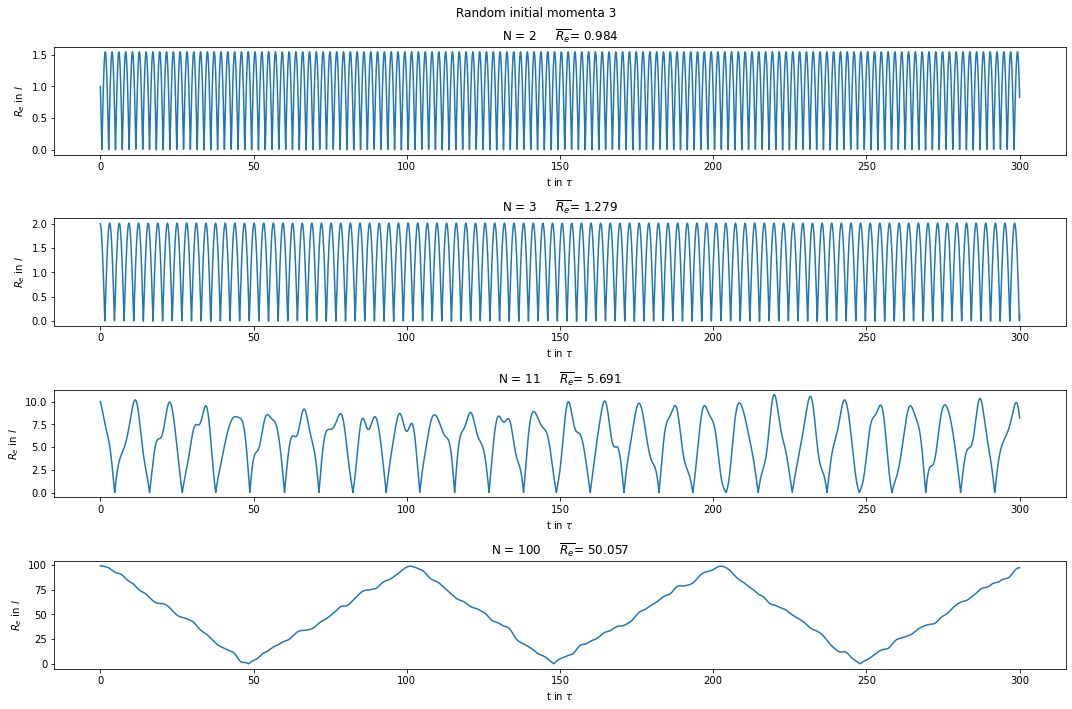

In [165]:
NN = np.array([2, 3, 11, 100])

ts = []
Ds = []
Ds_avg = []

for N in NN:
    D, p, t, D_avg = [], 0, 0, 0
    r, p, t = integrate_vv(t0, tend, 0.01, make_init(N)[0], np.random.normal(loc=0, scale=m*eps, size=N), calc_force)
    for i in range(len(p)):
        D.append(abs(r[i,0]-r[i,-1]))
    D_avg = np.average(D)
    ts.append(t)
    Ds.append(D)
    Ds_avg.append(D_avg)
fig, ax = plt.subplots(4,1, figsize=(15,10))
for i in range(len(NN)):
    ax[i].plot(ts[i], Ds[i])
    ax[i].set_title(f'N = {NN[i]}     ' + r'$\overline{R_e}$' + f'= {round(Ds_avg[i], 3)}')
    ax[i].set_xlabel(r't in $\tau$')
    ax[i].set_ylabel(r'$R_e$ in $l$')
fig.suptitle('Random initial momenta 3')
fig.tight_layout()